🧹 Data Cleaning & Analysis Summary

✅ Cleaning Steps Taken:

Handled Missing Values:

Filled missing values in Quantity and Price with the mean of their respective columns.

Filled missing values in categorical columns (Customer Name, Region) with "Unknown".

Filled missing Sale Date values with the most frequent date (mode).

Removed Duplicates:

Duplicate rows based on all columns were identified and removed to avoid skewed results.

Renamed Columns (if needed):

Ensured column names are clear and consistent for readability and easier access.

Created Derived Columns:

Added a new column Total_Sale = Quantity × Price to analyze revenue.

Saved Cleaned Data:

Exported the final cleaned DataFrame as sales_data_cleaned.csv.

📊 Key Insights:

Top-Selling Products: The top 3 products by quantity sold were identified to understand product popularity.

Sales by Region: A bar chart visualized total quantity sold by each region, highlighting regional performance.

Highest Sales Day: Identified the date with the maximum total sales, useful for understanding sales peaks.

Summary Statistics:

Provided mean, median, min, and max for Quantity and Price to describe numerical trends.



Clean and Summarize a Messy Sales Dataset Using Pandas

Given Sample Dataset

In [7]:
data = """Customer Name,Product,Quantity,Price,Sale Date,Region
Alice,Keyboard,5,25.0,2023-05-01,North
Bob,Mouse,3,,2023-05-03,South
,Monitor,2,150.0,2023-05-01,East
David,Keyboard,5,25.0,2023-05-01,North
Alice,Keyboard,5,25.0,2023-05-01,North
Eve,Laptop,,900.0,,West
Frank,Mouse,1,20.0,2023-05-04,
Grace,Monitor,2,150.0,2023-05-02,East
Bob,Mouse,3,,2023-05-03,South
Henry,Laptop,1,900.0,2023-05-05,West
Ivy,Keyboard,4,25.0,2023-05-01,North"""

# Write the string data directly to a .csv file
with open("sales_data.csv", "w") as file:
    file.write(data)

print("CSV file 'sales_data.csv' saved successfully.")


CSV file 'sales_data.csv' saved successfully.


Tasks:


1. Load the Data

In [8]:
import pandas as pd
df=pd.read_csv('sales_data.csv')#Import the CSV file into a Pandas DataFrame.
print(df)

   Customer Name   Product  Quantity  Price   Sale Date Region
0          Alice  Keyboard       5.0   25.0  2023-05-01  North
1            Bob     Mouse       3.0    NaN  2023-05-03  South
2            NaN   Monitor       2.0  150.0  2023-05-01   East
3          David  Keyboard       5.0   25.0  2023-05-01  North
4          Alice  Keyboard       5.0   25.0  2023-05-01  North
5            Eve    Laptop       NaN  900.0         NaN   West
6          Frank     Mouse       1.0   20.0  2023-05-04    NaN
7          Grace   Monitor       2.0  150.0  2023-05-02   East
8            Bob     Mouse       3.0    NaN  2023-05-03  South
9          Henry    Laptop       1.0  900.0  2023-05-05   West
10           Ivy  Keyboard       4.0   25.0  2023-05-01  North


In [9]:
#Display the first 10 rows and basic info of the dataset.

df.head(10)

,Customer Name,Product,Quantity,Price,Sale Date,Region
0,Alice,Keyboard,5.0,25.0,2023-05-01,North
1,Bob,Mouse,3.0,NaN,2023-05-03,South
2,NaN,Monitor,2.0,150.0,2023-05-01,East
3,David,Keyboard,5.0,25.0,2023-05-01,North
4,Alice,Keyboard,5.0,25.0,2023-05-01,North
5,Eve,Laptop,NaN,900.0,NaN,West
6,Frank,Mouse,1.0,20.0,2023-05-04,NaN
7,Grace,Monitor,2.0,150.0,2023-05-02,East
8,Bob,Mouse,3.0,NaN,2023-05-03,South
9,Henry,Laptop,1.0,900.0,2023-05-05,West


2. Explore Missing Values

In [10]:
#Identify which columns contain null values.
print(df.isnull())

    Customer Name  Product  Quantity  Price  Sale Date  Region
0           False    False     False  False      False   False
1           False    False     False   True      False   False
2            True    False     False  False      False   False
3           False    False     False  False      False   False
4           False    False     False  False      False   False
5           False    False      True  False       True   False
6           False    False     False  False      False    True
7           False    False     False  False      False   False
8           False    False     False   True      False   False
9           False    False     False  False      False   False
10          False    False     False  False      False   False


In [11]:
#Count the number of null values in each column.
print(df.isnull().sum())

Customer Name    1
Product          0
Quantity         1
Price            2
Sale Date        1
Region           1
dtype: int64


3. Handle Missing Values

In [18]:
# Fill missing values in the quantity and price columns with the mean of their respective columns.
#mean_age = df['Quantity'].mean()
#df['Quantity'].fillna(mean_age, inplace=True)
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Price']= df['Price'].fillna(df['Price'].mean())
print(df)


   Customer Name   Product  Quantity       Price   Sale Date Region
0          Alice  Keyboard       5.0   25.000000  2023-05-01  North
1            Bob     Mouse       3.0  246.666667  2023-05-03  South
2            NaN   Monitor       2.0  150.000000  2023-05-01   East
3          David  Keyboard       5.0   25.000000  2023-05-01  North
4          Alice  Keyboard       5.0   25.000000  2023-05-01  North
5            Eve    Laptop       3.1  900.000000         NaN   West
6          Frank     Mouse       1.0   20.000000  2023-05-04    NaN
7          Grace   Monitor       2.0  150.000000  2023-05-02   East
8            Bob     Mouse       3.0  246.666667  2023-05-03  South
9          Henry    Laptop       1.0  900.000000  2023-05-05   West
10           Ivy  Keyboard       4.0   25.000000  2023-05-01  North


In [19]:
# Fill missing values in categorical columns like customer_name and region with "Unknown"

df['Customer Name'] = df['Customer Name'].fillna('Unknown')
df['Region'] = df['Region'].fillna('Unknown')
print(df)

   Customer Name   Product  Quantity       Price   Sale Date   Region
0          Alice  Keyboard       5.0   25.000000  2023-05-01    North
1            Bob     Mouse       3.0  246.666667  2023-05-03    South
2        Unknown   Monitor       2.0  150.000000  2023-05-01     East
3          David  Keyboard       5.0   25.000000  2023-05-01    North
4          Alice  Keyboard       5.0   25.000000  2023-05-01    North
5            Eve    Laptop       3.1  900.000000         NaN     West
6          Frank     Mouse       1.0   20.000000  2023-05-04  Unknown
7          Grace   Monitor       2.0  150.000000  2023-05-02     East
8            Bob     Mouse       3.0  246.666667  2023-05-03    South
9          Henry    Laptop       1.0  900.000000  2023-05-05     West
10           Ivy  Keyboard       4.0   25.000000  2023-05-01    North


In [21]:
#For missing dates in the sale_date column, fill with the most common sale date (mode).

mode_date = df['Sale Date'].mode()[0]
df['Sale Date'] = df['Sale Date'].fillna(mode_date)
print(df)

   Customer Name   Product  Quantity       Price   Sale Date   Region
0          Alice  Keyboard       5.0   25.000000  2023-05-01    North
1            Bob     Mouse       3.0  246.666667  2023-05-03    South
2        Unknown   Monitor       2.0  150.000000  2023-05-01     East
3          David  Keyboard       5.0   25.000000  2023-05-01    North
4          Alice  Keyboard       5.0   25.000000  2023-05-01    North
5            Eve    Laptop       3.1  900.000000  2023-05-01     West
6          Frank     Mouse       1.0   20.000000  2023-05-04  Unknown
7          Grace   Monitor       2.0  150.000000  2023-05-02     East
8            Bob     Mouse       3.0  246.666667  2023-05-03    South
9          Henry    Laptop       1.0  900.000000  2023-05-05     West
10           Ivy  Keyboard       4.0   25.000000  2023-05-01    North


4. Remove Duplicate Records

In [22]:
# Identify any duplicate rows.
print(df.duplicated())

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool


In [23]:
# Remove duplicate rows, keeping the first occurrence.
print(df.drop_duplicates(keep='first'))

   Customer Name   Product  Quantity       Price   Sale Date   Region
0          Alice  Keyboard       5.0   25.000000  2023-05-01    North
1            Bob     Mouse       3.0  246.666667  2023-05-03    South
2        Unknown   Monitor       2.0  150.000000  2023-05-01     East
3          David  Keyboard       5.0   25.000000  2023-05-01    North
5            Eve    Laptop       3.1  900.000000  2023-05-01     West
6          Frank     Mouse       1.0   20.000000  2023-05-04  Unknown
7          Grace   Monitor       2.0  150.000000  2023-05-02     East
9          Henry    Laptop       1.0  900.000000  2023-05-05     West
10           Ivy  Keyboard       4.0   25.000000  2023-05-01    North


5. Rename Columns

In [26]:
# Rename the columns to be all lowercase and replace spaces with underscores (e.g., "Customer Name" → "customer_name").

df.rename(columns={'Customer Name': 'customer_name'},inplace=True)
print(df)


   customer_name   Product  Quantity       Price   Sale Date   Region
0          Alice  Keyboard       5.0   25.000000  2023-05-01    North
1            Bob     Mouse       3.0  246.666667  2023-05-03    South
2        Unknown   Monitor       2.0  150.000000  2023-05-01     East
3          David  Keyboard       5.0   25.000000  2023-05-01    North
4          Alice  Keyboard       5.0   25.000000  2023-05-01    North
5            Eve    Laptop       3.1  900.000000  2023-05-01     West
6          Frank     Mouse       1.0   20.000000  2023-05-04  Unknown
7          Grace   Monitor       2.0  150.000000  2023-05-02     East
8            Bob     Mouse       3.0  246.666667  2023-05-03    South
9          Henry    Laptop       1.0  900.000000  2023-05-05     West
10           Ivy  Keyboard       4.0   25.000000  2023-05-01    North


6. Summarize the Cleaned Dataset

In [27]:
# Display summary statistics (mean, median, min, max) for numerical columns like quantity and price.
print(df[['Quantity', 'Price']].agg(['mean', 'median', 'min', 'max']))


        Quantity       Price
mean         3.1  246.666667
median       3.0  150.000000
min          1.0   20.000000
max          5.0  900.000000


In [29]:
#Group data by region and show total sales quantity and average price per region.
grouped = df.groupby('Region').agg({
    'Quantity': 'sum',        # Total quantity
    'Price': 'mean'           # Average price
}).reset_index()

grouped.rename(columns={'Quantity': 'Total Quantity', 'Price': 'Average Price'}, inplace=True)
print(grouped)

    Region  Total Quantity  Average Price
0     East             4.0     150.000000
1    North            19.0      25.000000
2    South             6.0     246.666667
3  Unknown             1.0      20.000000
4     West             4.1     900.000000


In [31]:
print(df)

   customer_name   Product  Quantity       Price   Sale Date   Region
0          Alice  Keyboard       5.0   25.000000  2023-05-01    North
1            Bob     Mouse       3.0  246.666667  2023-05-03    South
2        Unknown   Monitor       2.0  150.000000  2023-05-01     East
3          David  Keyboard       5.0   25.000000  2023-05-01    North
4          Alice  Keyboard       5.0   25.000000  2023-05-01    North
5            Eve    Laptop       3.1  900.000000  2023-05-01     West
6          Frank     Mouse       1.0   20.000000  2023-05-04  Unknown
7          Grace   Monitor       2.0  150.000000  2023-05-02     East
8            Bob     Mouse       3.0  246.666667  2023-05-03    South
9          Henry    Laptop       1.0  900.000000  2023-05-05     West
10           Ivy  Keyboard       4.0   25.000000  2023-05-01    North


In [30]:
# Find the top 3 products by total quantity sold.
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(3)
print(top_products)


Product
Keyboard    19.0
Mouse        7.0
Laptop       4.1
Name: Quantity, dtype: float64


7. Save the Cleaned Data

In [32]:
# Save the cleaned and processed dataset into a new CSV file named sales_data_cleaned.csv.

df.to_csv('sales_data_cleaned.csv', index=False)


Optional

In [33]:
# Create a new column called total_sale by multiplying quantity and price.
df['total_sale']=df['Quantity']*df['Price']
print(df)

   customer_name   Product  Quantity       Price   Sale Date   Region  \
0          Alice  Keyboard       5.0   25.000000  2023-05-01    North   
1            Bob     Mouse       3.0  246.666667  2023-05-03    South   
2        Unknown   Monitor       2.0  150.000000  2023-05-01     East   
3          David  Keyboard       5.0   25.000000  2023-05-01    North   
4          Alice  Keyboard       5.0   25.000000  2023-05-01    North   
5            Eve    Laptop       3.1  900.000000  2023-05-01     West   
6          Frank     Mouse       1.0   20.000000  2023-05-04  Unknown   
7          Grace   Monitor       2.0  150.000000  2023-05-02     East   
8            Bob     Mouse       3.0  246.666667  2023-05-03    South   
9          Henry    Laptop       1.0  900.000000  2023-05-05     West   
10           Ivy  Keyboard       4.0   25.000000  2023-05-01    North   

    total_sale  
0        125.0  
1        740.0  
2        300.0  
3        125.0  
4        125.0  
5       2790.0  
6   

In [36]:
# Find the date with the highest total sales.
s= df.groupby('Sale Date')['total_sale'].sum()
print(s.idxmax())
print(df.total_sale.max())     # sort_values(ascending=False).head(1))

2023-05-01
2790.0


C:\Users\USER\AppData\Local\Temp\ipykernel_17240\1675092938.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Quantity', data=region_sales, palette='viridis')


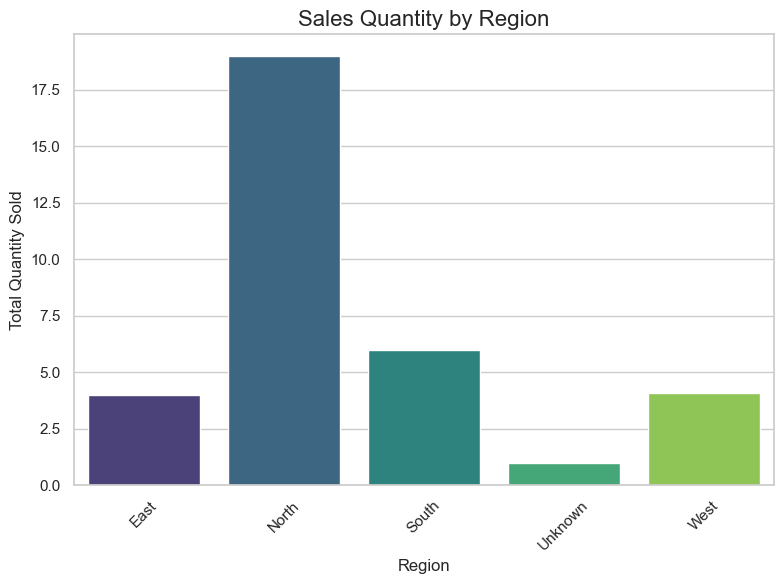

In [37]:
#Visualize the sales quantity by region using a bar chart (you can use matplotlib or seaborn).
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# Group by region and sum quantity
region_sales = df.groupby('Region')['Quantity'].sum().reset_index()

# Set plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Quantity', data=region_sales, palette='viridis')

# Title and labels
plt.title('Sales Quantity by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
